In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import linregress

study=pd.read_csv('Study_results.csv')
mouse=pd.read_csv('Mouse_metadata.csv')

print('The total number of mouse : ',len(mouse['Mouse ID'].unique()))





The total number of mouse :  249


In [6]:
# Find the duplicate rows


study_dup = study[study.duplicated(['Mouse ID','Timepoint'])]
display(study_dup)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [7]:
# Drop the duplicate rows from the original DataFrame and store it in new DataFrame


study_new = study.drop_duplicates(['Mouse ID','Timepoint'])
display(study_new)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [8]:
# Merge the 2 files on Mouse ID column after removing the duplicate rows


df=pd.merge(mouse,study_new,on='Mouse ID')
display(df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Calculate statistics data for each Drug Regimen

statistics_info=df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
display(statistics_info)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
# Get the Timeoint count for each Drug Regimen

df_1=df.groupby(['Drug Regimen'])[['Timepoint']].count()
df_2=df_1.reset_index()
display(df_2)

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


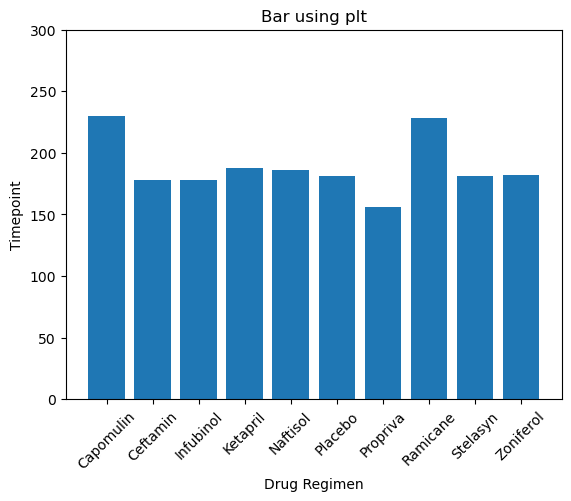

In [11]:
# Plot the above result using DataFrame bar method

ax = plt.bar(df_2['Drug Regimen'],df_2['Timepoint'])
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.title('Bar using plt')
plt.ylim(0,300)
plt.show()

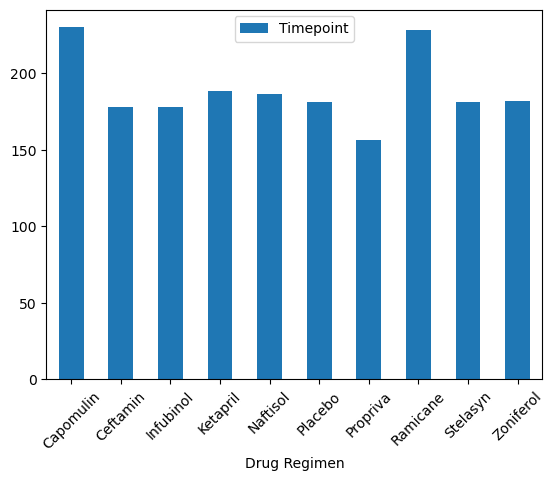

In [12]:
# Plot the above result using plot

df_2.plot(x='Drug Regimen',kind='bar',rot=45)
plt.show()

In [13]:
# Get the count for Mouse ID ( Male and Female )

mf=df.groupby('Sex')[['Mouse ID']].count()
mf=mf.reset_index()
display(mf)

,Sex,Mouse ID
0,Female,930
1,Male,958


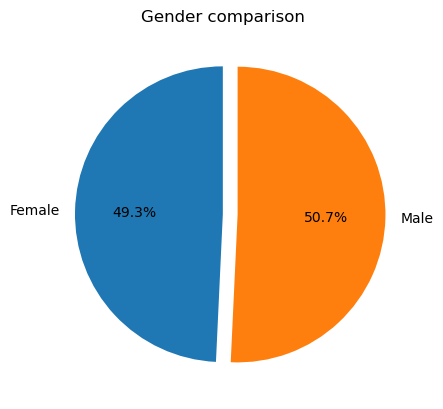

In [31]:
# Piechart using DataFrame

plt.pie(mf['Mouse ID'],labels=mf['Sex'],autopct='%1.1f%%',explode=(0,0.1),startangle=90)
plt.title('Gender comparison')
plt.show()

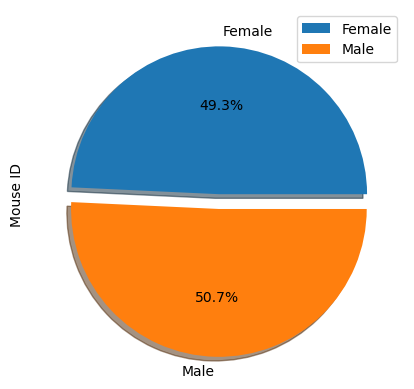

In [15]:
# Piechart using plot

mf.plot.pie(y='Mouse ID',autopct='%1.1f%%',explode=(0,0.1),shadow=True,labels=mf['Sex'])
plt.show()

In [16]:
# Get the max Timepoint for each mouse

greatest_tumore_volume_1=df.groupby('Mouse ID')[['Timepoint']].max()
greatest_tumore_volume=greatest_tumore_volume_1.reset_index()
display(greatest_tumore_volume)

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [17]:
# Merge the above data with the original table

pd.merge(greatest_tumore_volume,df,on=['Mouse ID','Timepoint'])



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Reset index for the merged data

df_1=df.groupby('Mouse ID')[['Timepoint']].max().reset_index()
df_3=pd.merge(df,df_1,on=['Mouse ID','Timepoint'])
display(df_3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [19]:
# Append the max tumor data treatment list in a list

max_tumor_volume=[]

treatment=['Capomulin','Ramicane','Infubinol','Ceftamin']
for drug in treatment:
    
    max_tumor_volume+=df_3[df_3['Drug Regimen']==drug]['Tumor Volume (mm3)'].to_list()
    
print(max_tumor_volume)

[23.34359787, 28.48403281, 28.43096411, 30.48598484, 31.02392294, 31.8962384, 32.37735684, 33.32909778, 34.45529799, 37.31184577, 36.04104736, 37.07402422, 38.84687569, 38.93963263, 38.98287774, 38.75326548, 38.1251644, 39.95234669, 40.65812366, 40.1592203, 40.72857787, 41.48300765, 41.58152074, 47.68596303, 46.53920617, 22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.56046955, 31.09533505, 33.39765251, 32.97852192, 33.56240217, 36.13485243, 38.81036633, 37.22565033, 36.37451039, 36.56165229, 37.31123552, 38.34200823, 38.4076183, 40.65900627, 40.66771292, 45.22086888, 43.0475426, 43.41938077, 43.16637266, 44.18345092, 67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141, 62.99935619, 45.0, 56.05774909,

In [20]:
# Get the upper bound for the above list


maximun=max_tumor_volume[0]
for k in range(len(max_tumor_volume)-1):
    if max_tumor_volume[k]>=max_tumor_volume[k+1]:
        maximum=max_tumor_volume[k]
print(maximum)



68.59474498


In [21]:
# Get the lower bound for the above list


minimum=max_tumor_volume[0]
for m in range(len(max_tumor_volume)-1):
    if max_tumor_volume[m]>=max_tumor_volume[m+1]:
        maximum=max_tumor_volume[m]
print(minimum)

23.34359787


In [22]:
# Calculate the quartiles

df_3['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

0.25    45.934712
0.50    55.841410
0.75    64.957562
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Calculate the IQR at 0,25

q_1=np.quantile(max_tumor_volume,0.25)
print('First IQR : ',q_1)

# Calculate the IQR at 0,5

q_2=np.quantile(max_tumor_volume,0.5)
print('Second IQR : ',q_2)

# Calculate the IQR at 0,75

q_3=np.quantile(max_tumor_volume,0.75)
print('Third IQR : ',q_3)

First IQR :  37.1877438025
Second IQR :  45.0
Third IQR :  59.930261755


In [24]:
# Get the data for Capomulin , Ramicane, Infubinol , Ceftamin and put them in a new DataFrame

treatment=['Capomulin','Ramicane','Infubinol','Ceftamin']
df_Capomulin=df_3[df_3['Drug Regimen']=='Capomulin']
df_Ramicane=df_3[df_3['Drug Regimen']=='Ramicane']
df_Infubinol=df_3[df_3['Drug Regimen']=='Infubinol']
df_Ceftamin=df_3[df_3['Drug Regimen']=='Ceftamin']
final_df=pd.concat([df_Capomulin,df_Ramicane,df_Infubinol,df_Ceftamin])
display(final_df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
228,x226,Ceftamin,Male,23,28,0,45.000000,0
232,x581,Ceftamin,Female,19,28,45,64.634949,3
235,x822,Ceftamin,Male,3,29,45,61.386660,3
241,y769,Ceftamin,Female,6,27,45,68.594745,4


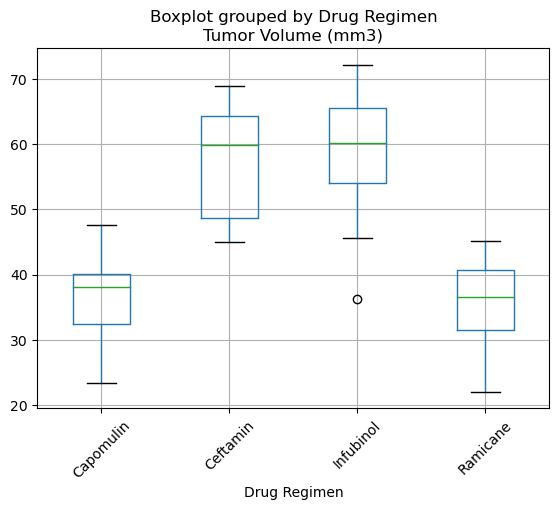

In [25]:
# Plot the above data using boxplot

boxplot = final_df.boxplot(column=['Tumor Volume (mm3)'],by='Drug Regimen',rot=45)
plt.show()

In [26]:
# Get data for a unique mouse for Capomulin

df_10=df.loc[(df['Drug Regimen']=='Capomulin') & (df['Mouse ID']=='x401'),:]
display(df_10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


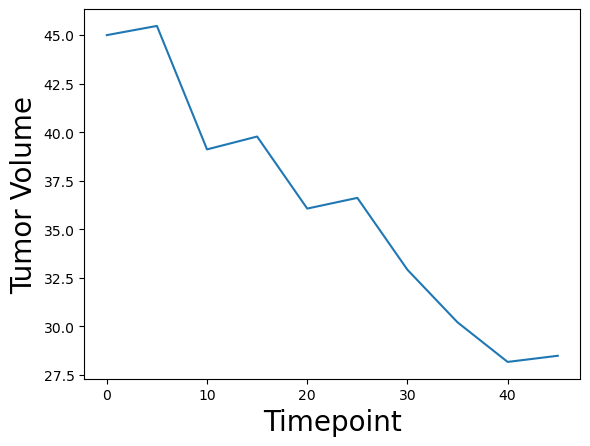

In [27]:
# Plot the data for Tumor Volume (mm3) and Timepoint in a line

plt.plot (df_10['Timepoint'],df_10['Tumor Volume (mm3)'])
plt.xlabel('Timepoint',fontsize=20)
plt.ylabel('Tumor Volume',fontsize=20)
plt.show()

In [28]:
# Create a DataFrame for Capomulin drug using Weight (g) and Tumor Volume (mm3)

weight_tumor=df_Capomulin.groupby('Weight (g)')[['Tumor Volume (mm3)']].mean().reset_index()
weight_tumor

,Weight (g),Tumor Volume (mm3)
0,15,28.484033
1,17,30.287623
2,19,36.416666
3,20,37.311846
4,21,39.175015
5,22,39.571049
6,23,39.602030
7,24,47.685963
8,25,44.060363


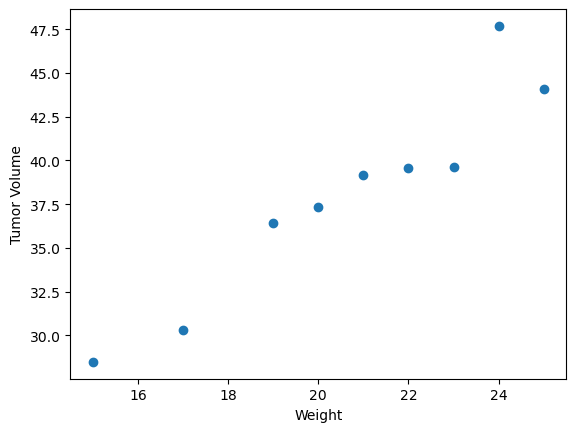

In [29]:
# Use scatter to plot the above data

plt.scatter(weight_tumor['Weight (g)'],weight_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

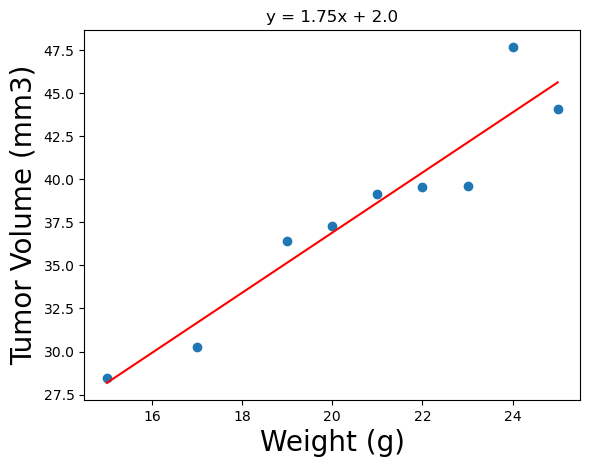

In [30]:
# Find the regression eqt and plot it with the scatter graph

x_values=weight_tumor['Weight (g)']
y_values=weight_tumor['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)',fontsize=20)
plt.ylabel('Tumor Volume (mm3)',fontsize=20)
plt.title(line_eq)
plt.show()